Step 1 – Install required libraries

In [1]:
!pip install pandas numpy scikit-learn nltk matplotlib

Step 2 – Import libraries

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Step 3 – Upload dataset

In [3]:
import os
os.listdir()

['.config', 'spam.csv.xlsx', 'sample_data']

Step 4 – Load and Clean Data

In [5]:
# Load dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only required columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Convert labels to binary (ham = 0, spam = 1)
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

print("✅ Dataset Loaded Successfully!")
print("\nSample records:")
print(data.head())
print("\nData Shape:", data.shape)


✅ Dataset Loaded Successfully!

Sample records:
  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0

Data Shape: (5572, 3)


Step 5 – Text Preprocessing

In [6]:
ps = PorterStemmer()
stop_words = stopwords.words('english')

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    # Remove stopwords and apply stemming
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning to all messages
data['clean_message'] = data['message'].apply(clean_text)

print("🧹 Text cleaning completed!")
data.head()


🧹 Text cleaning completed!


,label,message,label_num,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goe usf live around though


Step 6 – Visualize the Data

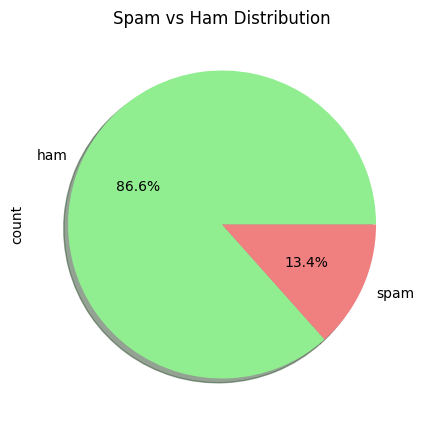

In [7]:
plt.figure(figsize=(5,5))
data['label'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, colors=['lightgreen','lightcoral'])
plt.title('Spam vs Ham Distribution')
plt.show()


Step 7 – Split Data and Create Model

In [8]:
# Split features and labels
X = data['clean_message']
y = data['label_num']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert text to vectors
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Create and train model
model = MultinomialNB()
model.fit(X_train_cv, y_train)

print("🤖 Model Training Completed!")


🤖 Model Training Completed!


Step 8 – Evaluate Model

In [9]:
# Predict on test data
y_pred = model.predict(X_test_cv)

# Accuracy and reports
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.9820531227566404

📊 Confusion Matrix:
 [[1198    4]
 [  21  170]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.98      0.89      0.93       191

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



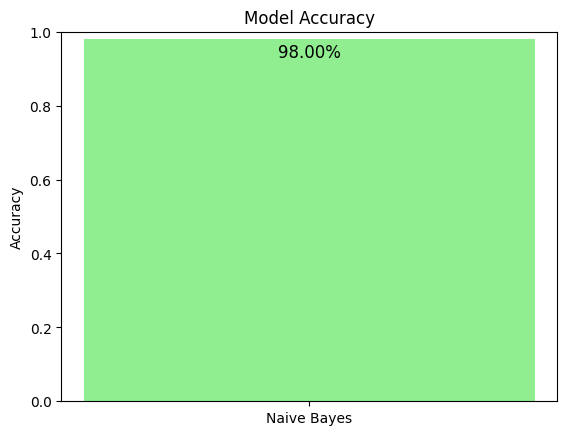

In [14]:
import matplotlib.pyplot as plt

accuracy = 0.98
plt.bar(['Naive Bayes'], [accuracy], color='lightgreen')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.text(0, accuracy - 0.05, f"{accuracy*100:.2f}%", ha='center', fontsize=12)
plt.show()


Step 9 – Test Custom Messages

In [15]:
def predict_spam(msg):
    msg_clean = clean_text(msg)
    msg_vector = cv.transform([msg_clean])
    pred = model.predict(msg_vector)
    return "🚫 SPAM" if pred[0] == 1 else "📩 NOT SPAM"

# Test a few sample messages
samples = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize.",
    "Hey, are we still meeting at 5pm tomorrow?",
    "Get cheap loans instantly at low interest rates. Apply now!"
]

for s in samples:
    print(f"\nMessage: {s}")
    print("Prediction:", predict_spam(s))



Message: Congratulations! You've won a free iPhone. Click here to claim your prize.
Prediction: 🚫 SPAM

Message: Hey, are we still meeting at 5pm tomorrow?
Prediction: 📩 NOT SPAM

Message: Get cheap loans instantly at low interest rates. Apply now!
Prediction: 🚫 SPAM


Step 10 – Interactive Prediction

In [17]:
# Try your own message
while True:
    msg = input("\nEnter a message (or type 'exit' to stop): ")
    if msg.lower() == 'exit':
        break
    print("Prediction:", predict_spam(msg))



Enter a message (or type 'exit' to stop): Hey, are we still meeting at 5pm tomorrow?"
Prediction: 📩 NOT SPAM

Enter a message (or type 'exit' to stop): exit
